## 건강상태와 의료기관 이용에 관한 데이터 분석

<b> 이번 프로젝트에서는 사람들이 병원에 입원한 이유와 입원일수에 관계가 있는지 알아보고 연령대에 따른 건강상태의 차이에 대해서 분석해보려고 합니다. <br>

In [25]:
# 먼저 데이터를 분석하는 데 필요한 패키지를 로드하겠습니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

In [26]:
# pd.read_spss()를 이용해 복지패널 데이터를 불러오고 복사본을 만들어 분석에 활용하겠습니다.
welfare_data = pd.read_spss('./Data/Koweps_hpwc14_2019_beta2.sav')
welfare_d = welfare_data.copy()

<b> 복지패널 데이터들 중에 분석에 필요한 자료인 ‘성별’, ‘태어난 연도’, ‘건강상태’, ‘1년간 의료기관 이용 외래진료횟수’, ‘입원횟수’, ‘입원일수’, ‘병원에 입원한 이유’ 데이터를 불러와 새로운 데이터셋을 만들겠습니다.

In [27]:
welfare = welfare_d[['h14_g3', 'h14_g4', 'h14_med2', 'h14_med3', 'h14_med4', 'h14_med5', 'h14_med6']]
welfare.head()

,h14_g3,h14_g4,h14_med2,h14_med3,h14_med4,h14_med5,h14_med6
0,2.0,1945.0,4.0,27.0,1.0,3.0,1.0
1,1.0,1948.0,3.0,33.0,0.0,0.0,0.0
2,1.0,1942.0,3.0,4.0,1.0,1.0,1.0
3,1.0,1962.0,2.0,23.0,0.0,0.0,0.0
4,2.0,1963.0,2.0,2.0,1.0,120.0,5.0


<b> 코드북을 참고하여 분석에 사용할 변수 7개의 이름을 알아보기 쉬운 단어로 변경하겠습니다.

In [28]:
welfare = welfare.rename(
    columns = {'h14_g3' : 'sex',
               'h14_g4' : 'birth',
               'h14_med2' : 'condition',
               'h14_med3' : 'hosp_visits',
               'h14_med4' : 'hosp_num',
               'h14_med5' : 'hosp_day',
               'h14_med6' : 'hosp_reason'})
welfare.head()

,sex,birth,condition,hosp_visits,hosp_num,hosp_day,hosp_reason
0,2.0,1945.0,4.0,27.0,1.0,3.0,1.0
1,1.0,1948.0,3.0,33.0,0.0,0.0,0.0
2,1.0,1942.0,3.0,4.0,1.0,1.0,1.0
3,1.0,1962.0,2.0,23.0,0.0,0.0,0.0
4,2.0,1963.0,2.0,2.0,1.0,120.0,5.0


<hr>

## 01. 병원에 입원한 이유와 입원일수의 관계

<b> 병원에 입원한 이유에 대한 자료가 0-7 까지의 숫자로 저장되어 있어서 알기 쉽도록 해당 내용을 한글로 변경하겠습니다.

In [29]:
welfare['hosp_reason'] = np.where(welfare['hosp_reason'] == 0, '비해당',
                         np.where(welfare['hosp_reason'] == 1, '지병/질병',
                         np.where(welfare['hosp_reason'] == 2, '사고',
                         np.where(welfare['hosp_reason'] == 3, '출산',
                         np.where(welfare['hosp_reason'] == 4, '건강검진',
                         np.where(welfare['hosp_reason'] == 5, '요양/휴식',
                         np.where(welfare['hosp_reason'] == 6, '성,정형/교정',
                         np.where(welfare['hosp_reason'] == 7, '기타', '무응답'))))))))

In [30]:
welfare.head()

,sex,birth,condition,hosp_visits,hosp_num,hosp_day,hosp_reason
0,2.0,1945.0,4.0,27.0,1.0,3.0,지병/질병
1,1.0,1948.0,3.0,33.0,0.0,0.0,비해당
2,1.0,1942.0,3.0,4.0,1.0,1.0,지병/질병
3,1.0,1962.0,2.0,23.0,0.0,0.0,비해당
4,2.0,1963.0,2.0,2.0,1.0,120.0,요양/휴식


<b> 입원한 이유별로 평균 입원일수를 만들어 보겠습니다.

In [31]:
# 입원한 이유별 평균 입원일수 만들기
hosp_res_day = welfare.dropna(subset = ['hosp_reason', 'hosp_day']) \
                      .groupby('hosp_reason', as_index = False) \
                      .agg(mean_hosp_day = ('hosp_day', 'mean'))
hosp_res_day

,hosp_reason,mean_hosp_day
0,건강검진,2.333333
1,기타,9.200000
2,비해당,0.000000
3,사고,22.897661
4,"성,정형/교정",6.666667
5,요양/휴식,45.428571
6,지병/질병,21.988020
7,출산,5.138462


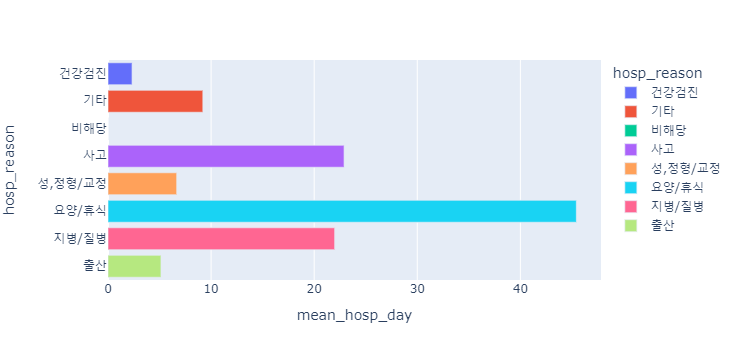

In [32]:
import plotly.express as px
px.bar(data_frame=hosp_res_day, x='mean_hosp_day', y='hosp_reason', color='hosp_reason')

<b> 출력된 표와 그래프를 보면 '요양/휴식'으로 입원한 사람의 입원일수가 46 정도로 가장 길고 비해당을 제외하면 '건강검진'으로 입원한 환자의 입원일수가 3정도로 가장 짧은 것을 알 수 있습니다. <br>
<b> 첫번째 분석인 '어떤 이유로 입원한 환자가 가장 오래 입원했을까?'의 결과는 요양/휴식으로 입원한 환자가 가장 오래 입원했다는 분석 결과가 나왔습니다. <br>
<b> 개인적인 예상으로는 사고로 입원한 환자의 입원일수가 가장 많을것이라고 예상했으나 요양과 휴식으로 입원한 환자의 입원일수가 두배 이상으로 차이나는 것을 보고 신기하고 신선했습니다. 

<hr>

## 02. 두번째 분석 내용 - 연령대에 따른 건강상태 차이

<b> 다음으로는 '어떤 연령대가 가장 건강한 사람의 비율이 높을까?'에 대해 분석해보도록 하겠습니다.

<b> 먼저 태어난 연도 변수를 이용해 나이 변수를 만들고 요약통계량을 구해보겠습니다.

In [35]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

<b> 앞에서 만든 나이 변수를 이용해 10대 미만부터 80대 이상까지 연령대 변수를 만들겠습니다.

In [36]:
welfare = welfare.assign(age_group = np.where(welfare['age'] < 10, '10대 미만',
                                     np.where(welfare['age'] < 20, '10대',
                                     np.where(welfare['age'] < 30, '20대',
                                     np.where(welfare['age'] < 40, '30대',
                                     np.where(welfare['age'] < 50, '40대',
                                     np.where(welfare['age'] < 60, '50대',
                                     np.where(welfare['age'] < 70, '60대',
                                     np.where(welfare['age'] < 80, '70대',
                                     np.where(welfare['age'] < 90, '80대', '80대 이상'))))))))))

In [37]:
welfare['age_group'].value_counts()

70대       2173
40대       1897
60대       1834
50대       1830
80대       1745
20대       1378
10대       1376
30대       1236
10대 미만     746
80대 이상     203
Name: age_group, dtype: int64

<b> 건강상태에 대한 자료가 1-5 까지의 숫자로 저장되어 있어서 알아보기 쉽도록 해당 내용을 한글로 변경하겠습니다.

In [38]:
welfare = welfare.assign(cond = np.where(welfare['condition'] == 1, '아주 건강하다',
                                np.where(welfare['condition'] == 2, '건강한 편이다',
                                np.where(welfare['condition'] == 3, '보통이다',
                                np.where(welfare['condition'] == 4, '건강하지 않은 편이다',
                                np.where(welfare['condition'] == 5, '건강이 아주 안 좋다', '무응답'))))))

In [39]:
welfare['cond']

0        건강하지 않은 편이다
1               보통이다
2               보통이다
3            건강한 편이다
4            건강한 편이다
            ...     
14413        건강한 편이다
14414        아주 건강하다
14415        아주 건강하다
14416        아주 건강하다
14417        아주 건강하다
Name: cond, Length: 14418, dtype: object

<b> 연령대별 건강상태를 알아보기 위해 연령대별 건강상태 비율표를 만들겠습니다.

In [40]:
age_cond = welfare.groupby('cond', as_index = False) \
                  ['age_group'] \
                  .value_counts(normalize = True)
age_cond.head(10)

,cond,age_group,proportion
0,건강이 아주 안 좋다,80대,0.408824
1,건강이 아주 안 좋다,70대,0.288235
2,건강이 아주 안 좋다,60대,0.117647
3,건강이 아주 안 좋다,80대 이상,0.082353
4,건강이 아주 안 좋다,50대,0.050000
5,건강이 아주 안 좋다,40대,0.017647
6,건강이 아주 안 좋다,30대,0.011765
7,건강이 아주 안 좋다,20대,0.011765
8,건강이 아주 안 좋다,10대,0.008824
9,건강이 아주 안 좋다,10대 미만,0.002941


<b> age_cond의 proportion을 백분율로 바꾸고 소수점 첫째 자리까지 반올림하겠습니다.

In [41]:
age_cond = \
    age_cond.assign(proportion = age_cond ['proportion'] * 100) \
            .round(1)
age_cond.head(10)

,cond,age_group,proportion
0,건강이 아주 안 좋다,80대,40.9
1,건강이 아주 안 좋다,70대,28.8
2,건강이 아주 안 좋다,60대,11.8
3,건강이 아주 안 좋다,80대 이상,8.2
4,건강이 아주 안 좋다,50대,5.0
5,건강이 아주 안 좋다,40대,1.8
6,건강이 아주 안 좋다,30대,1.2
7,건강이 아주 안 좋다,20대,1.2
8,건강이 아주 안 좋다,10대,0.9
9,건강이 아주 안 좋다,10대 미만,0.3


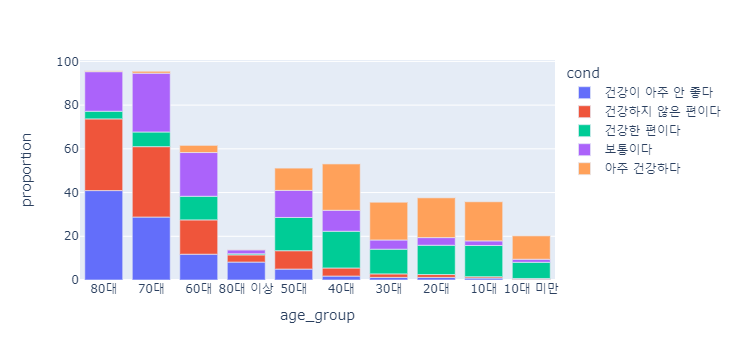

In [42]:
px.bar(data_frame=age_cond, x='age_group', y='proportion', color='cond')

<b> 출력된 그래프를 보면 10대부터 40대 까지가 건강한 사람의 비율이 높은 편이라는 것을 확인할 수 있습니다. <br>
<b> 두번째 분석인 '어떤 연령대가 가장 건강한 사람의 비율이 높을까?'의 결과는 40대가 가장 건강한 사람의 비율이 높다는 분석 결과가 나왔습니다. <br>
<b> 10대부터 30대까지 건강한 사람의 비율이 비슷한 점이 신기했습니다.

### 이번 과제를 마치며
### 이번 과제를 통해 주제를 정하고 데이터 분석을 해봤을 때 예상을 벗어나는 결과가 나오는것이 신기했고 다음에는 더 많은 자료를 가지고 더 정확한 분석 결과를 내보고 싶다는 생각을 했습니다. 또한 어떠한 이유에서라도 병원에 입원하는 일이 없도록 건강하게 살자고 다짐했습니다.